In [3]:
import pandas as pd
import numpy as np
from numpy.random import seed, randint
import math

# Plotting
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

# Data synthesis

**Generated fixed true parameter vector**

In [4]:
bee_count = 30
K = bee_count + 1 # can be 0 ... 30 bees sting


def gen_stochastic_vector(K: int) -> list:
    # Generate P
    matrix = np.random.rand(1,K)
    P = matrix/matrix.sum(axis=1)[:,None]
    return P[0] # get only x_1,.., x_k

P_true = gen_stochastic_vector(K)
print("Real parameter, support K={}, \n P={}".format(K, P_true))

Real parameter, support K=31, 
 P=[0.04912444 0.020503   0.05517522 0.04272419 0.00016163 0.04903296
 0.04012866 0.03795301 0.02214294 0.0091897  0.03353033 0.03312324
 0.059981   0.00688017 0.01420804 0.01780395 0.00636734 0.044895
 0.05554669 0.04572205 0.03634728 0.01488646 0.02870537 0.03303544
 0.03681781 0.04361143 0.02640266 0.0046956  0.05343266 0.058117
 0.01975472]


**Sample using P**

Sample experiment result:
 [19 12 31 22  0 26 19 19  8  7 19 12 31  3 12 11  2 19 30 20 16  7 13 15
 24 20 11  3 28 32  9]


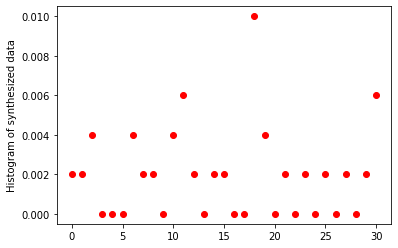

In [6]:
N = 500

def do_experiment(n):
    return np.random.multinomial(n, P_true, size=1)[0]

def plot_multinomial_data(data):
    data = np.histogram(data, bins=len(data))
    plt.plot(data[0]/N, 'ro')
    plt.ylabel('Histogram of synthesized data')
    plt.show()

data = do_experiment(N)
print("Sample experiment result:\n {}".format(data))
plot_multinomial_data(data)
# Visualize BCI w.r.t P_true

**RMSE distance**

In [7]:
def rmse(p, p_hat):
    s = 0
    for it in zip(p, p_hat):
        diff = it[0] - it[1]
        s += diff * diff
    return math.sqrt(s / len(p))

# Bayesian inference, iteration scheme

In [8]:
def bayes(data, alpha):
    new_alpha = [sum(x) for x in zip(alpha, data)]
    estimated_p = alpha / sum(alpha)
    return (new_alpha, estimated_p)

**Iteration scheme**

In [9]:
n_iter = 100
alpha = np.ones(K)
estimated_p = np.zeros(K)
traces = []
for i in range(0, n_iter):
    # synthesize data
    data = do_experiment(N)
    # inference
    alpha, estimated_p = bayes(data, alpha)
    traces.append((alpha, estimated_p))
print("Last estimated P \n {} \n RMSE to true P = {}".format(estimated_p, rmse(estimated_p, P_true)))


Last estimated P 
 [0.04912075 0.02065373 0.05541984 0.04278129 0.00020189 0.04815166
 0.04039894 0.03791565 0.02329854 0.00888333 0.03432194 0.03278755
 0.06030567 0.00696533 0.0138701  0.01885688 0.00698552 0.04568856
 0.05439018 0.0440936  0.03636107 0.0150209  0.02883043 0.03385758
 0.03674466 0.04320527 0.02685187 0.00448204 0.05287598 0.05755991
 0.01911934] 
 RMSE to true P = 0.000611593837428234


**Show the convergence to true parameter P**

In [11]:
import pymc3 as pm
for tr in traces:
    posterior_sample = np.random.dirichlet(tr[0], 1000)
    # How hpd is calculated for multivariate (dirichlet)
    hpd = pm.stats.hpd(posterior_sample)
    for it in hpd:
        print("HPD={}, width={}".format(
            it,
            abs(it[0] - it[1])
        ))
    
    print("estimated_p={}, distance={}".format(
        tr[1],
        rmse(tr[1], P_true)
    ))
    print("-----------------")

HPD=[0.03002739 0.06359249], width=0.03356509822658271
HPD=[0.01113587 0.03377206], width=0.0226361854598238
HPD=[0.03782768 0.07508724], width=0.03725955719716342
HPD=[0.02737081 0.05792986], width=0.03055904823272149
HPD=[6.45982640e-06 5.09924085e-03], width=0.005092781020214894
HPD=[0.04622763 0.08470569], width=0.038478062001366636
HPD=[0.02238649 0.0511855 ], width=0.028799010217915713
HPD=[0.0234092  0.05510074], width=0.03169154147293087
HPD=[0.02486278 0.05479721], width=0.02993442730135103
HPD=[0.00146078 0.01501545], width=0.013554669668138801
HPD=[0.01404856 0.0412423 ], width=0.027193736969070327
HPD=[0.02453707 0.05557291], width=0.03103583018587622
HPD=[0.03477002 0.07052061], width=0.03575059531185001
HPD=[0.00213282 0.01727987], width=0.015147056273027312
HPD=[0.00248664 0.01707033], width=0.014583689442733982
HPD=[0.00406315 0.02176349], width=0.017700341694590026
HPD=[0.00237195 0.01682532], width=0.014453370307983519
HPD=[0.02525156 0.05693824], width=0.031686683756

HPD=[0.04230065 0.04916309], width=0.006862439029246818
HPD=[0.05096432 0.05862055], width=0.0076562301684297215
HPD=[0.04218174 0.04935461], width=0.00717286728897279
HPD=[0.0318844  0.03807438], width=0.006189979953477705
HPD=[0.01388986 0.01824354], width=0.004353684761964138
HPD=[0.02788427 0.03360261], width=0.005718338003742884
HPD=[0.03083018 0.03705207], width=0.006221886810854421
HPD=[0.03429572 0.04069162], width=0.00639590592679138
HPD=[0.04079199 0.04767199], width=0.006879996383382547
HPD=[0.0235898  0.02913432], width=0.005544513973798442
HPD=[0.00368635 0.00604784], width=0.0023614989787694024
HPD=[0.04811414 0.05498868], width=0.0068745437928234635
HPD=[0.0520928  0.05985386], width=0.0077610610832444735
HPD=[0.01738315 0.0221694 ], width=0.004786253942326169
estimated_p=[0.04804256 0.02102901 0.05286344 0.04322168 0.00033247 0.04962181
 0.0393151  0.03765273 0.02435375 0.00881057 0.03549165 0.03116948
 0.0585155  0.00640013 0.01454576 0.01820298 0.00698196 0.04579835
 

HPD=[0.04357598 0.04843525], width=0.004859261145663964
HPD=[0.05072327 0.0560189 ], width=0.00529563548485109
HPD=[0.04283738 0.04770131], width=0.004863937680609838
HPD=[0.03392988 0.03830923], width=0.0043793486622442784
HPD=[0.01413647 0.01713806], width=0.003001597698704863
HPD=[0.02801683 0.0321618 ], width=0.004144976299639561
HPD=[0.03218193 0.03655788], width=0.0043759507589180985
HPD=[0.03474575 0.03921964], width=0.0044738840165256324
HPD=[0.04109357 0.04618613], width=0.005092561048256096
HPD=[0.02481305 0.02832108], width=0.0035080338927912028
HPD=[0.00374926 0.00530054], width=0.0015512815100157977
HPD=[0.04909966 0.05415512], width=0.005055465076549297
HPD=[0.05485243 0.06022808], width=0.00537565340139072
HPD=[0.01911021 0.02243278], width=0.003322564131527213
estimated_p=[0.0474212  0.02029483 0.05421278 0.04278694 0.0002397  0.04889936
 0.04054972 0.03755343 0.02409013 0.00842955 0.03463705 0.03152091
 0.05996564 0.00687148 0.01502137 0.01869682 0.00667173 0.04590308


HPD=[0.05163159 0.05603615], width=0.004404561025737171
HPD=[0.04250998 0.04646945], width=0.00395947237488526
HPD=[0.03467929 0.03821459], width=0.0035352981857480967
HPD=[0.01459891 0.01685788], width=0.0022589740848017147
HPD=[0.0275573  0.03066001], width=0.0031027080712896712
HPD=[0.03209503 0.03546227], width=0.0033672373848257914
HPD=[0.03470808 0.03823406], width=0.0035259871644038737
HPD=[0.04158664 0.04543475], width=0.00384811213635676
HPD=[0.02492504 0.02779535], width=0.002870310779196559
HPD=[0.00395989 0.00518813], width=0.0012282462161492215
HPD=[0.05069469 0.05503383], width=0.004339133912796202
HPD=[0.05508025 0.0593626 ], width=0.00428234546291021
HPD=[0.01818515 0.02087998], width=0.002694830004831214
estimated_p=[0.04881783 0.02058083 0.05530612 0.04308219 0.00025953 0.04876593
 0.04001972 0.03809919 0.02317614 0.00851263 0.034881   0.0327788
 0.06047079 0.00677377 0.01398874 0.01858244 0.00690353 0.04549583
 0.05377488 0.0444058  0.03633438 0.01570164 0.02898964 0

In [70]:
import scipy.stats as stats
stats.bayes_mvs(posterior_sample, 0.95)

(Mean(statistic=0.03225806451612903, minmax=(0.032095014545664165, 0.0324211144865939)),
 Variance(statistic=0.00021453935012571266, minmax=(0.000211161897992838, 0.00021791680225858733)),
 Std_dev(statistic=0.01464716184541267, minmax=(0.014531868105624696, 0.014762455585200642)))

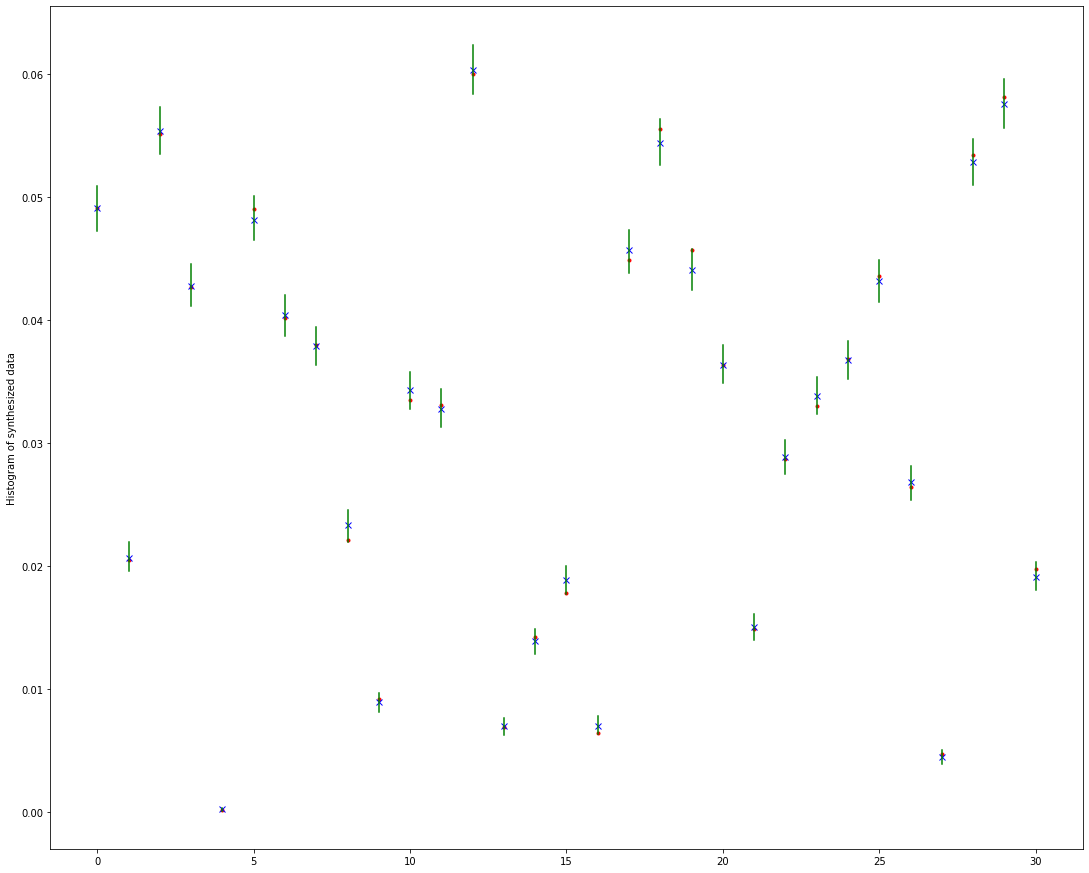

In [31]:
posterior_sample = np.random.dirichlet(alpha, 10000)
hpd = pm.stats.hpd(posterior_sample)
fig = plt.gcf()
fig.set_size_inches(18.5, 15.5)
def plot_estimated_params_with_hpd():
    plt.plot(P_true, 'r.')
    plt.plot(estimated_p, 'bx')
    for i, it in enumerate(hpd):
        plt.plot([i, i], [it[0], it[1]], 'g-')
    plt.ylabel('Histogram of synthesized data')
    plt.show()

plot_estimated_params_with_hpd()
    